# **Statistical Analysis of Formula 1 Driver Standings: Insights into Performance, Consistency, and Trends**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis, gmean, hmean, pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the datasets
df_standings = pd.read_csv("/content/drive/MyDrive/OEL1/driver_standings.csv")
df_drivers = pd.read_csv("/content/drive/MyDrive/OEL1/drivers.csv")


In [ ]:
# Merge datasets on driverId
df = pd.merge(df_standings, df_drivers[['driverId', 'forename', 'surname', 'nationality']], on='driverId', how='left')


In [ ]:
df.describe()

,driverStandingsId,raceId,driverId,points,position,wins
count,34863.000000,34863.000000,34863.000000,34863.000000,34863.000000,34863.000000
mean,43176.154232,584.413562,316.932909,14.704423,19.716720,0.277343
std,21934.276898,292.275820,274.665660,38.978094,16.293401,1.032618
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,19834.500000,354.000000,88.000000,0.000000,8.000000,0.000000
50%,50044.000000,603.000000,223.000000,1.000000,16.000000,0.000000
75%,62054.500000,805.000000,521.000000,10.000000,26.000000,0.000000
max,73270.000000,1144.000000,862.000000,575.000000,108.000000,19.000000


In [ ]:
# Select numerical columns for analysis
numerical_columns = ["points", "position", "wins"]

## Compute statistical summaries

In [ ]:

central_tendency = {}
dispersion = {}
position_measures = {}
skewness_kurtosis = {}
mean_measures = {}

for col in numerical_columns:
    central_tendency[col] = {
        "mean": df[col].mean(),
        "median": df[col].median(),
        "mode": df[col].mode().tolist()
    }

    mean_measures[col] = {
        "Arithmetic Mean (AM)": df[col].mean(),
        "Geometric Mean (GM)": gmean(df[col][df[col] > 0]),      # GM requires positive values
        "Harmonic Mean (HM)": hmean(df[col][df[col] > 0])        # HM requires positive values
    }

    dispersion[col] = {
        "range": df[col].max() - df[col].min(),
        "variance": df[col].var(),
        "std_dev": df[col].std()
    }

    position_measures[col] = {
        "Q1": df[col].quantile(0.25),
        "Q2 (Median)": df[col].quantile(0.50),
        "Q3": df[col].quantile(0.75),
        "IQR": df[col].quantile(0.75) - df[col].quantile(0.25)
    }

    skew_value = skew(df[col])
    kurt_value = kurtosis(df[col])
    kurt_type = "Mesokurtic" if kurt_value == 0 else ("Leptokurtic" if kurt_value > 0 else "Platykurtic")

    skewness_kurtosis[col] = {
        "skewness": skew_value,
        "kurtosis": kurt_value,
        "kurtosis_type": kurt_type
    }

## **Measure of Central Tendencies**

In [ ]:
# Print central tendency measures separately
for col, values in central_tendency.items():
    print(f"{col} Central Tendencies:")
    for key, value in values.items():
        print(f"  {key}: {value}")
    print("-" * 50)

points Central Tendencies:
  mean: 14.704423314115251
  median: 1.0
  mode: [0.0]
--------------------------------------------------
position Central Tendencies:
  mean: 19.716719731520524
  median: 16.0
  mode: [1, 2, 3, 4, 5, 6, 7]
--------------------------------------------------
wins Central Tendencies:
  mean: 0.2773427415885036
  median: 0.0
  mode: [0]
--------------------------------------------------


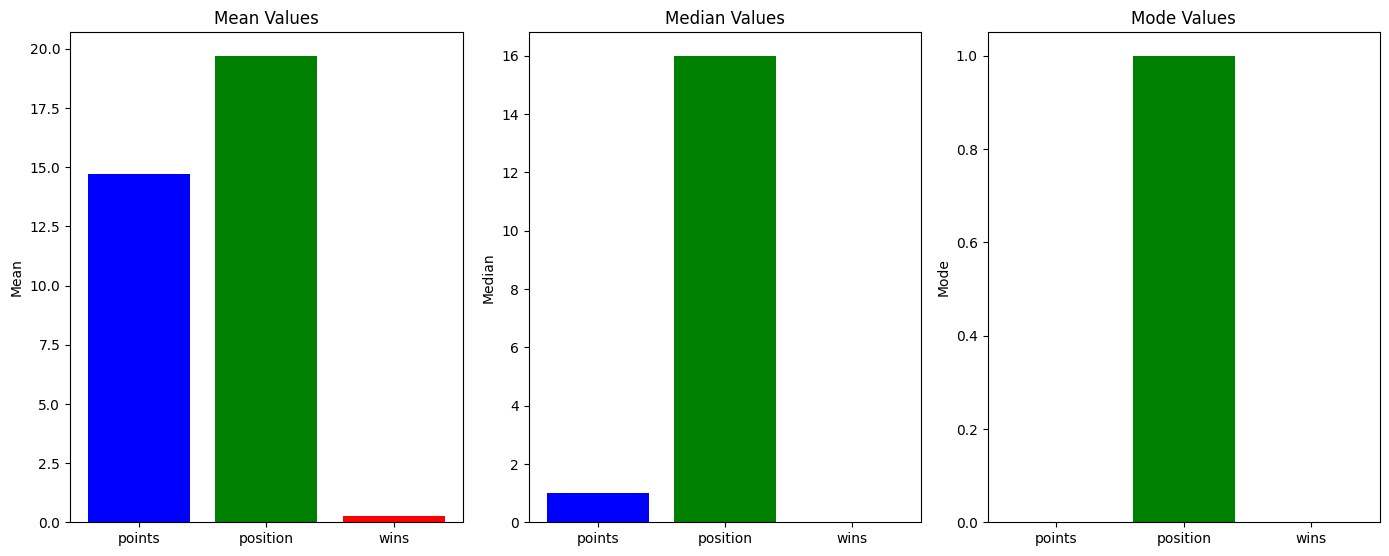

In [ ]:
plt.figure(figsize=(14, 16))

plt.subplot(3, 3, 1)
means = [central_tendency[col]['mean'] for col in numerical_columns]
plt.bar(numerical_columns, means, color=['blue', 'green', 'red'])
plt.title("Mean Values")
plt.ylabel("Mean")

plt.subplot(3, 3, 2)
medians = [central_tendency[col]['median'] for col in numerical_columns]
plt.bar(numerical_columns, medians, color=['blue', 'green', 'red'])
plt.title("Median Values")
plt.ylabel("Median")

plt.subplot(3, 3, 3)
modes = [central_tendency[col]['mode'][0] if central_tendency[col]['mode'] else None for col in numerical_columns]
plt.bar(numerical_columns, modes, color=['blue', 'green', 'red'])
plt.title("Mode Values")
plt.ylabel("Mode")

plt.tight_layout()
plt.show()



## Mean, Median & Mode of Position data

Text(0, 0.5, 'Value')

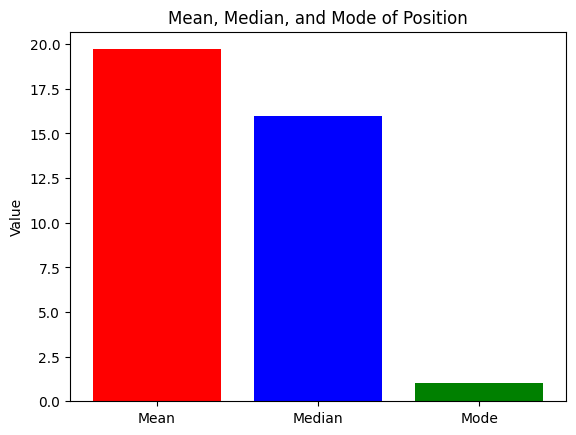

In [ ]:
mean_value = central_tendency['position']['mean']
median_value = central_tendency['position']['median']
mode_value = central_tendency['position']['mode'][0] if central_tendency['position']['mode'] else None
plt.bar(["Mean", "Median", "Mode"], [mean_value, median_value, mode_value], color=['red', 'blue', 'green'])
plt.title("Mean, Median, and Mode of Position")
plt.ylabel("Value")

## **AM, GM & HM**

In [ ]:
for col, values in mean_measures.items():
    print(f"{col} Mean Measures:")
    for key, value in values.items():
        print(f"  {key}: {value}")
    print("-" * 50)

points Mean Measures:
  Arithmetic Mean (AM): 14.704423314115251
  Geometric Mean (GM): 10.224160924133145
  Harmonic Mean (HM): 4.448761282635225
--------------------------------------------------
position Mean Measures:
  Arithmetic Mean (AM): 19.716719731520524
  Geometric Mean (GM): 13.663776316789278
  Harmonic Mean (HM): 7.85945410164395
--------------------------------------------------
wins Mean Measures:
  Arithmetic Mean (AM): 0.2773427415885036
  Geometric Mean (GM): 1.7682466552219978
  Harmonic Mean (HM): 1.4731805259748922
--------------------------------------------------


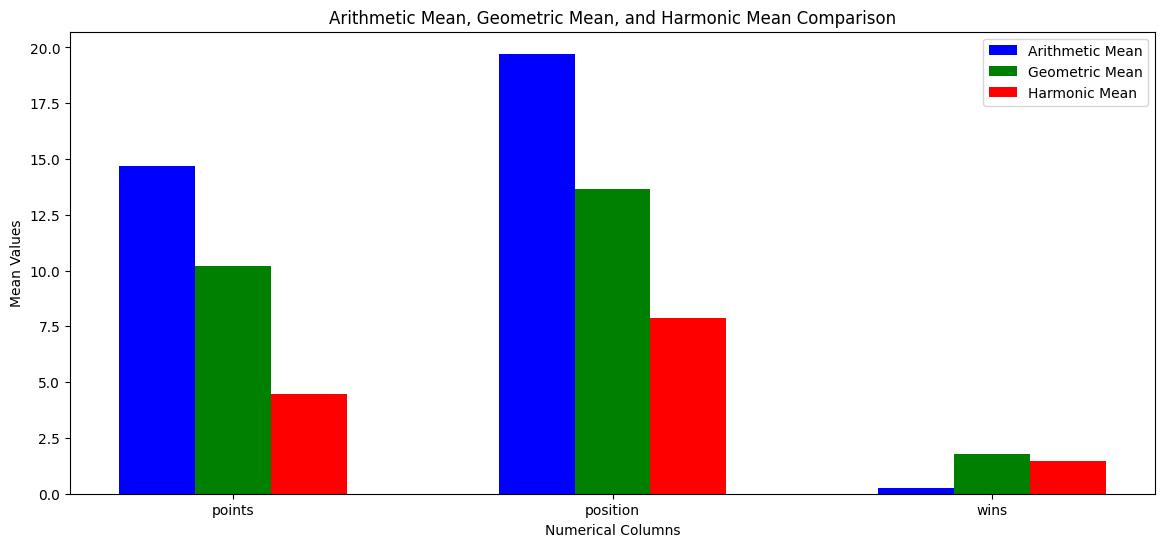

In [ ]:
# Plot AM, GM, HM for numerical columns
plt.figure(figsize=(14, 6))

# Extract values for plotting
am_values = [mean_measures[col]['Arithmetic Mean (AM)'] for col in numerical_columns]
gm_values = [mean_measures[col]['Geometric Mean (GM)'] for col in numerical_columns]
hm_values = [mean_measures[col]['Harmonic Mean (HM)'] for col in numerical_columns]

# Bar Chart for AM, GM, HM
bar_width = 0.2
x_labels = numerical_columns
x_indexes = range(len(x_labels))

plt.bar(x_indexes, am_values, width=bar_width, label="Arithmetic Mean", color='blue')
plt.bar([x + bar_width for x in x_indexes], gm_values, width=bar_width, label="Geometric Mean", color='green')
plt.bar([x + 2 * bar_width for x in x_indexes], hm_values, width=bar_width, label="Harmonic Mean", color='red')

plt.xticks([x + bar_width for x in x_indexes], x_labels)
plt.xlabel("Numerical Columns")
plt.ylabel("Mean Values")
plt.title("Arithmetic Mean, Geometric Mean, and Harmonic Mean Comparison")
plt.legend()
plt.show()

##**Measures of Dispersion**

In [ ]:
# Print measures of dispersion separately
for col, values in dispersion.items():
    print(f"{col} Measures of Dispersion:")
    for key, value in values.items():
        print(f"  {key}: {value}")
    print("-" * 50)

points Measures of Dispersion:
  range: 575.0
  variance: 1519.2918356370042
  std_dev: 38.97809430484005
--------------------------------------------------
position Measures of Dispersion:
  range: 107
  variance: 265.4749103341301
  std_dev: 16.293400821624996
--------------------------------------------------
wins Measures of Dispersion:
  range: 19
  variance: 1.0663006434386717
  std_dev: 1.0326183435513199
--------------------------------------------------


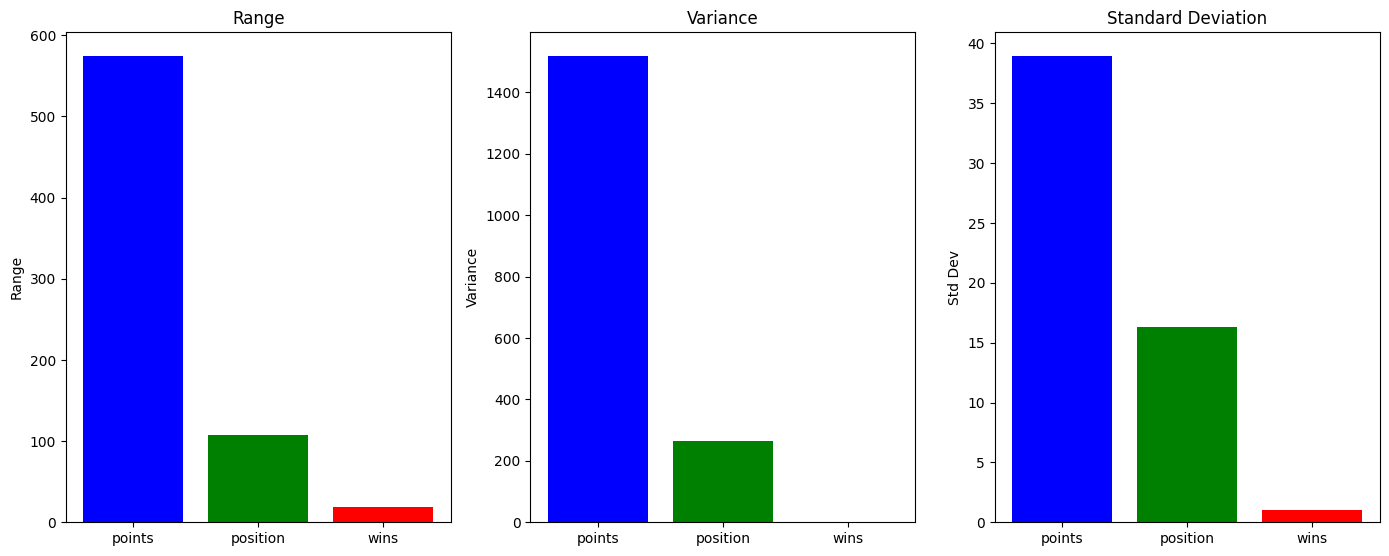

In [ ]:
plt.figure(figsize=(14, 16))
# Bar Chart for Range
plt.subplot(3, 3, 1)
ranges = [dispersion[col]['range'] for col in numerical_columns]
plt.bar(numerical_columns, ranges, color=['blue', 'green', 'red'])
plt.title("Range")
plt.ylabel("Range")

# Bar Chart for Variance
plt.subplot(3, 3, 2)
variances = [dispersion[col]['variance'] for col in numerical_columns]
plt.bar(numerical_columns, variances, color=['blue', 'green', 'red'])
plt.title("Variance")
plt.ylabel("Variance")

# Bar Chart for Standard Deviation
plt.subplot(3, 3, 3)
std_devs = [dispersion[col]['std_dev'] for col in numerical_columns]
plt.bar(numerical_columns, std_devs, color=['blue', 'green', 'red'])
plt.title("Standard Deviation")
plt.ylabel("Std Dev")

plt.tight_layout()
plt.show()

##**Measures of Position**

In [ ]:
# Print measures of position separately
for col, values in position_measures.items():
    print(f"{col} Measures of Position:")
    for key, value in values.items():
        print(f"  {key}: {value}")
    print("-" * 50)

points Measures of Position:
  Q1: 0.0
  Q2 (Median): 1.0
  Q3: 10.0
  IQR: 10.0
--------------------------------------------------
position Measures of Position:
  Q1: 8.0
  Q2 (Median): 16.0
  Q3: 26.0
  IQR: 18.0
--------------------------------------------------
wins Measures of Position:
  Q1: 0.0
  Q2 (Median): 0.0
  Q3: 0.0
  IQR: 0.0
--------------------------------------------------


### **Box Plot for Quartiles**

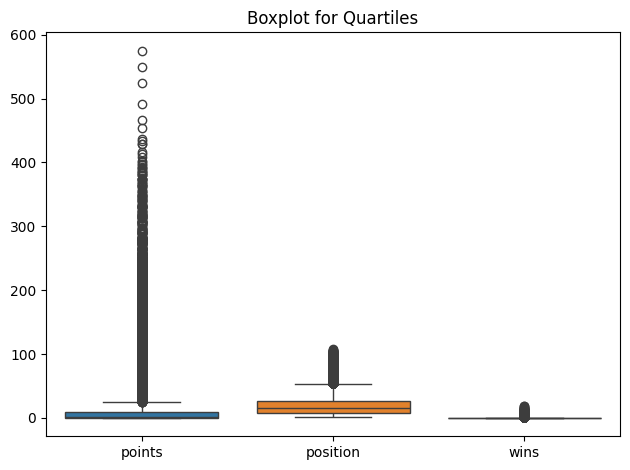

In [ ]:
# Boxplot for Quartiles
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot for Quartiles")

plt.tight_layout()
plt.show()

In [ ]:
# Print skewness and kurtosis
for col, values in skewness_kurtosis.items():
    print(f"{col} Skewness and Kurtosis:")
    for key, value in values.items():
        print(f"  {key}: {value}")
    print("-" * 50)

points Skewness and Kurtosis:
  skewness: 5.048205294160243
  kurtosis: 32.49844861172885
  kurtosis_type: Leptokurtic
--------------------------------------------------
position Skewness and Kurtosis:
  skewness: 1.6678198615464361
  kurtosis: 3.345249257945877
  kurtosis_type: Leptokurtic
--------------------------------------------------
wins Skewness and Kurtosis:
  skewness: 5.995202246489988
  kurtosis: 48.60700632727216
  kurtosis_type: Leptokurtic
--------------------------------------------------


### **Skewness and Kurtosis of Points data**

Skewness of Points: 5.048205294160243
Kurtosis of Points: 32.49844861172885


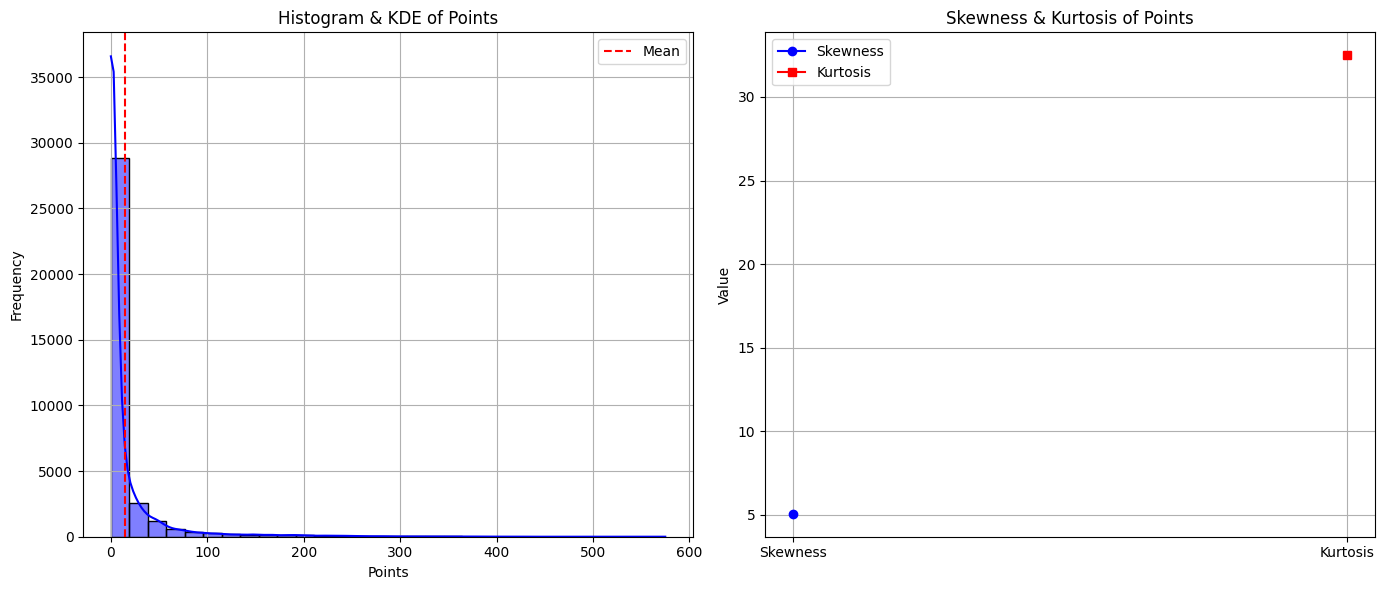

In [ ]:

points_skewness = skew(df['points'])
points_kurtosis = kurtosis(df['points'])

print(f"Skewness of Points: {points_skewness}")
print(f"Kurtosis of Points: {points_kurtosis}")

plt.figure(figsize=(14, 6))

# Histogram & KDE for Points
plt.subplot(1, 2, 1)
sns.histplot(df['points'], bins=30, kde=True, color='blue')
plt.axvline(df['points'].mean(), color='red', linestyle='dashed', label="Mean")
plt.title("Histogram & KDE of Points")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Line Plot for Skewness & Kurtosis
plt.subplot(1, 2, 2)
plt.plot(["Skewness"], [points_skewness], marker='o', linestyle='-', color='blue', label="Skewness")
plt.plot(["Kurtosis"], [points_kurtosis], marker='s', linestyle='-', color='red', label="Kurtosis")
plt.title("Skewness & Kurtosis of Points")
plt.ylabel("Value")
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()


### **Skewness and Kurtosis of Position data**

Skewness of Position: 1.6678198615464361
Kurtosis of Position: 3.345249257945877


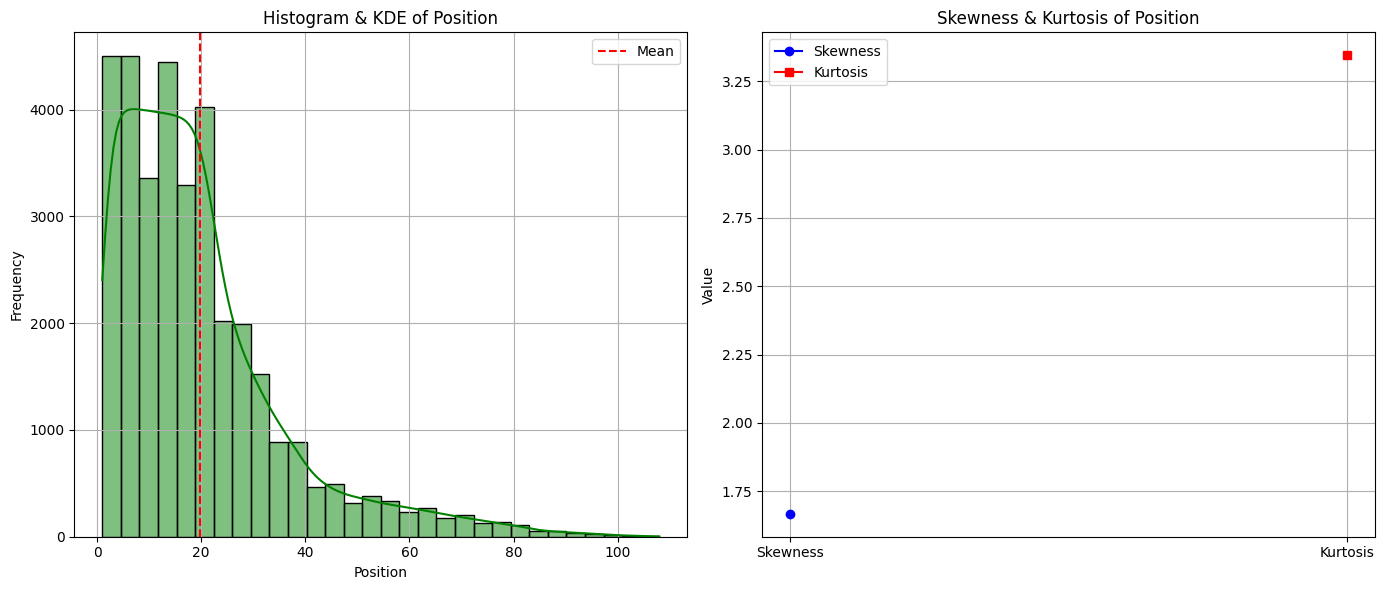

In [ ]:
# Calculate skewness and kurtosis for Position
position_skewness = skew(df['position'])
position_kurtosis = kurtosis(df['position'])

# Print Skewness and Kurtosis
print(f"Skewness of Position: {position_skewness}")
print(f"Kurtosis of Position: {position_kurtosis}")

# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Histogram & KDE for Position
plt.subplot(1, 2, 1)
sns.histplot(df['position'], bins=30, kde=True, color='green')
plt.axvline(df['position'].mean(), color='red', linestyle='dashed', label="Mean")
plt.title("Histogram & KDE of Position")
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Line Plot for Skewness & Kurtosis
plt.subplot(1, 2, 2)
plt.plot(["Skewness"], [position_skewness], marker='o', linestyle='-', color='blue', label="Skewness")
plt.plot(["Kurtosis"], [position_kurtosis], marker='s', linestyle='-', color='red', label="Kurtosis")
plt.title("Skewness & Kurtosis of Position")
plt.ylabel("Value")
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()


###  **Trends**

Text(0.5, 1.0, 'Top 5 Drivers by Points (Pie Chart)')

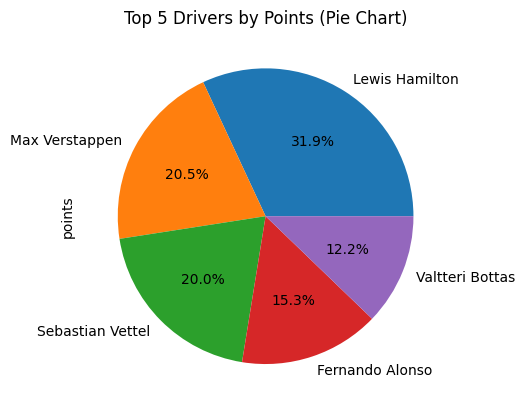

In [ ]:
top_drivers = df.groupby(['forename', 'surname'])['points'].sum().nlargest(5)
top_drivers.plot(kind='pie', autopct='%1.1f%%', labels=[f"{fn} {ln}" for fn, ln in top_drivers.index])
plt.title("Top 5 Drivers by Points (Pie Chart)")

Text(0.5, 0, 'Points')

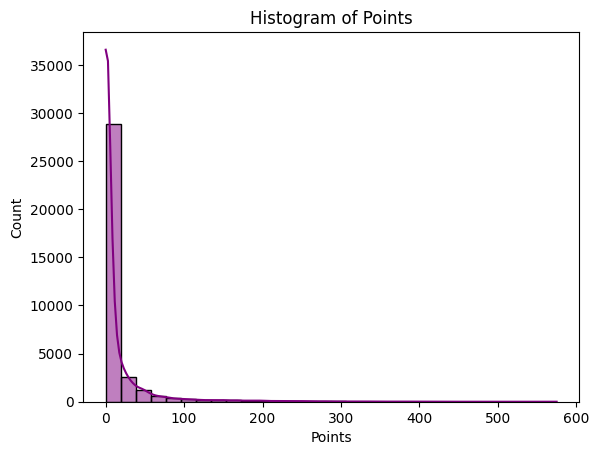

In [ ]:
sns.histplot(df["points"], bins=30, kde=True, color='purple')
plt.title("Histogram of Points")
plt.xlabel("Points")

<Figure size 1200x600 with 0 Axes>

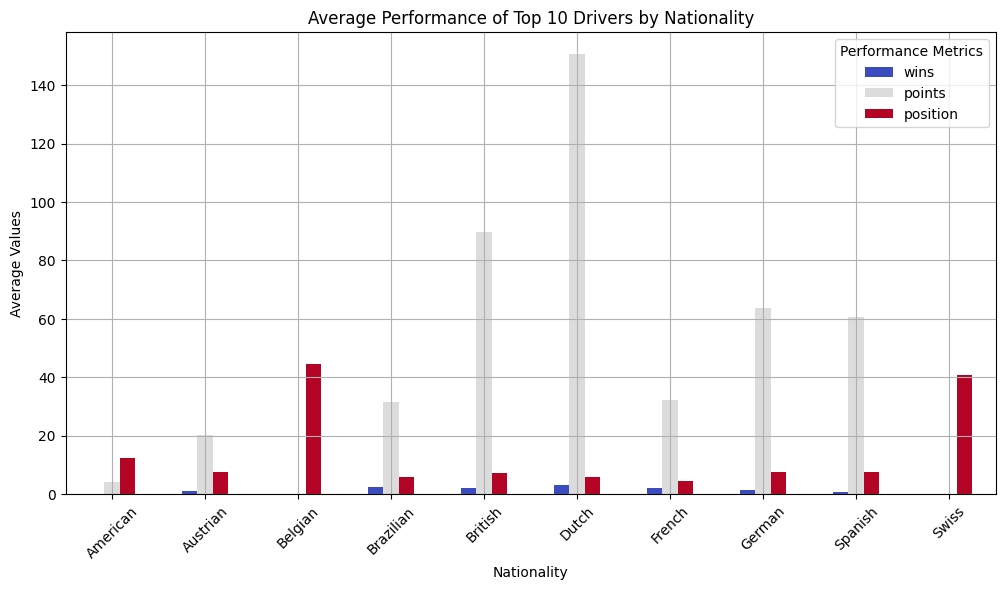

In [ ]:
# top 10 drivers based on total wins
top_10_drivers = df.groupby(['forename', 'surname', 'nationality'])['wins'].sum().nlargest(10).reset_index()

# Group by nationality and calculate average wins, points, and position
nationality_performance = df[df['forename'].isin(top_10_drivers['forename'])].groupby('nationality')[
    ['wins', 'points', 'position']].mean().reset_index()

# Plot grouped bar chart for nationality-based performance
plt.figure(figsize=(12, 6))
nationality_performance.set_index('nationality').plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title("Average Performance of Top 10 Drivers by Nationality")
plt.ylabel("Average Values")
plt.xlabel("Nationality")
plt.xticks(rotation=45)
plt.legend(title="Performance Metrics")
plt.grid()
plt.show()


### Model based on Bayes’ Theorem.

In [ ]:
# Feature engineering
X = df_standings[['points', 'position', 'wins']]
y = df_standings['wins'].apply(lambda x: 1 if x > 0 else 0)  # Binary target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train an SVM model
model = SVC(kernel='rbf', probability=True)  # Use probability=True for predicting probabilities
model.fit(X_train, y_train)

# Evaluate model performance
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2%}")

Model accuracy: 99.23%


In [ ]:
#Predicting win probability for a driver with specific metrics
new_driver_metrics = [[100, 5, 2]]  # Example metrics: points, position, wins
win_probability = model.predict_proba(new_driver_metrics)[0][1]
print(f"Win probability: {win_probability:.2%}")


Win probability: 91.97%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
# Example: Visualizing how 'points' affect win probability
points_range = np.linspace(0, 200, 100)  # Range of points to test
position = 5  # Fixed position
wins = 2  # Fixed wins

probabilities = []
for points in points_range:
    metrics = [[points, position, wins]]
    probability = model.predict_proba(metrics)[0][1]
    probabilities.append(probability)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have va

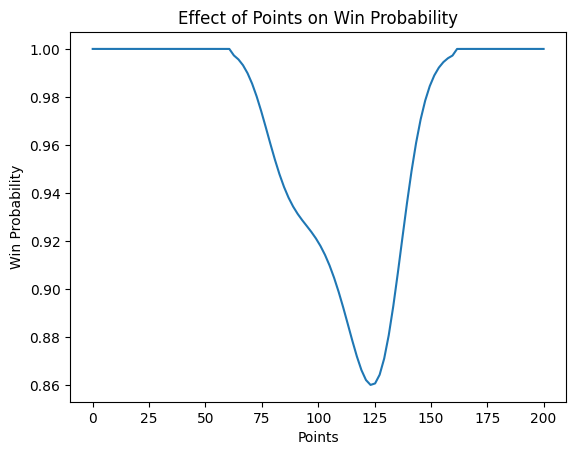

In [ ]:
plt.plot(points_range, probabilities)
plt.xlabel('Points')
plt.ylabel('Win Probability')
plt.title('Effect of Points on Win Probability')
plt.show()

Index(['driverStandingsId', 'raceId', 'driverId', 'points', 'position',
       'positionText', 'wins'],
      dtype='object')


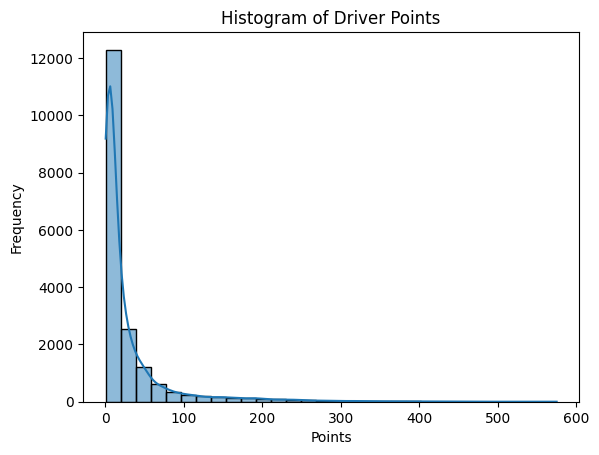

/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


  Distribution  KS_statistic        p_value  \
3      lognorm      0.055446   2.189365e-49   
4         beta      0.110800  2.594240e-196   
1        expon      0.242096   0.000000e+00   
0         norm      0.294768   0.000000e+00   
2        gamma      0.882477   0.000000e+00   

                                              Params  
3  (1.5732891504007038, 0.4848163544005236, 8.959...  
4  (0.5413918548355605, 112.73431519473341, 0.499...  
1                          (0.5, 27.487132718239888)  
0            (27.987132718239888, 50.19822023767695)  
2  (0.0767776883977491, 0.4999999999999999, 3.749...  


In [ ]:
# Check basic info
print(df_standings.columns)

# Let's assume the column of interest is 'points'
data = df_standings['points']
data = data[data > 0]  # remove zeros if needed for log or other distributions

# Plot histogram
sns.histplot(data, kde=True, bins=30)
plt.title("Histogram of Driver Points")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.show()

# Fit distributions
distributions = ['norm', 'expon', 'gamma', 'lognorm', 'beta']
results = []

for dist_name in distributions:
    dist = getattr(stats, dist_name)
    params = dist.fit(data)

    # Calculate KS statistic
    D, p = stats.kstest(data, dist_name, args=params)

    results.append({
        'Distribution': dist_name,
        'KS_statistic': D,
        'p_value': p,
        'Params': params
    })

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='KS_statistic'))

### Best Fitting Distribution

| Distribution | KS Statistic | p-value      | Comments      |
|--------------|--------------|--------------|----------------|
| Lognormal    | 0.0554       | ~2.19e-49    | Best fit       |
| Beta         | 0.1108       | ~2.55e-196   | Okay fit       |
| Exponential  | 0.2421       | 0            | Poor fit       |
| Normal       | 0.2948       | 0            | Very poor fit  |
| Gamma        | 0.8825       | 0            | Worst fit      |


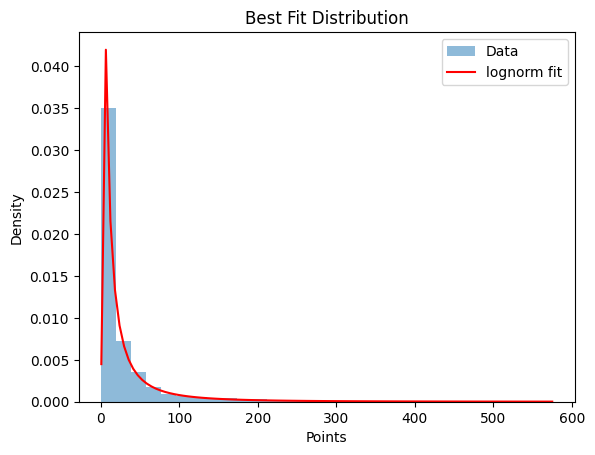

In [ ]:
# Plot best fit visually (e.g., normal)
best_fit = results_df.sort_values(by='KS_statistic').iloc[0]
best_dist = getattr(stats, best_fit['Distribution'])
params = best_fit['Params']

x = np.linspace(data.min(), data.max(), 100)
pdf_fitted = best_dist.pdf(x, *params)

plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')
plt.plot(x, pdf_fitted, 'r-', label=f'{best_fit["Distribution"]} fit')
plt.legend()
plt.title("Best Fit Distribution")
plt.xlabel("Points")
plt.ylabel("Density")
plt.show()

### Correlation and Regression using different methods.


In [ ]:
# Merge datasets on 'driverId'
df = df_standings.merge(df_drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')

# Selecting relevant numeric columns
numeric_df = df[['points', 'position', 'wins']].dropna()

# Pearson, Spearman
correlation_results = {
    'Correlation Method': ['Pearson', 'Spearman'],
    'Points vs Wins': [],
    'Points vs Position': [],
    'Wins vs Position': []
}

# Pearson
correlation_results['Points vs Wins'].append(pearsonr(numeric_df['points'], numeric_df['wins'])[0])
correlation_results['Points vs Position'].append(pearsonr(numeric_df['points'], numeric_df['position'])[0])
correlation_results['Wins vs Position'].append(pearsonr(numeric_df['wins'], numeric_df['position'])[0])

# Spearman
correlation_results['Points vs Wins'].append(spearmanr(numeric_df['points'], numeric_df['wins'])[0])
correlation_results['Points vs Position'].append(spearmanr(numeric_df['points'], numeric_df['position'])[0])
correlation_results['Wins vs Position'].append(spearmanr(numeric_df['wins'], numeric_df['position'])[0])


# Convert to DataFrame
correlation_df = pd.DataFrame(correlation_results)

correlation_df

,Correlation Method,Points vs Wins,Points vs Position,Wins vs Position
0,Pearson,0.67129,-0.345554,-0.286339
1,Spearman,0.52796,-0.862349,-0.528931


In [ ]:
# Select relevant columns and remove missing data
data = df[['wins', 'points']].dropna()

# Define X and y
X = sm.add_constant(data['wins'])  # independent variable (with intercept)
y = data['points']                 # dependent variable

# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                 2.860e+04
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        05:04:50   Log-Likelihood:            -1.6673e+05
No. Observations:               34863   AIC:                         3.335e+05
Df Residuals:                   34861   BIC:                         3.335e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6768      0.160     47.916      0.0

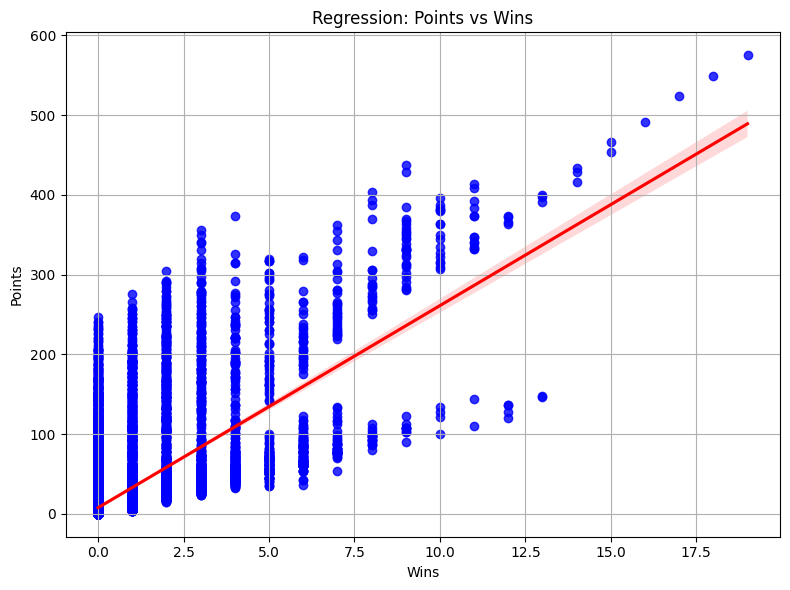

In [ ]:
# Plot the data points and regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='wins', y='points', data=data, ci=95, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression: Points vs Wins")
plt.xlabel("Wins")
plt.ylabel("Points")
plt.grid(True)
plt.tight_layout()
plt.show()

### Hypothesis based on data

In [ ]:
# Drop missing values and select relevant columns
df = df[['points', 'position', 'wins']].dropna()

# --- Hypothesis Examples ---
# H0: mean points = 100
# H1: mean points ≠ 100

# Standard Error
std_error = df['points'].std() / np.sqrt(len(df))

# T-Test (one-sample)
t_stat, t_pval = stats.ttest_1samp(df['points'], 100)

# Z-Test approximation
z_stat = (df['points'].mean() - 100) / std_error
z_pval = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# F-Test: Comparing variances of 'points' and 'wins'
f_stat = np.var(df['points'], ddof=1) / np.var(df['wins'], ddof=1)
df1 = len(df['points']) - 1
df2 = len(df['wins']) - 1
f_pval = 1 - stats.f.cdf(f_stat, df1, df2)

# Chi-Square Test: Goodness of fit on 'position' frequencies
observed_freq = df['position'].value_counts()
expected_freq = [observed_freq.mean()] * len(observed_freq)
chi_stat, chi_pval = stats.chisquare(f_obs=observed_freq, f_exp=expected_freq)

# ANOVA: Are average points different across position groups?
df['position_group'] = pd.cut(df['position'], bins=[0, 5, 10, 20, 40], labels=['Top 5', '6-10', '11-20', '21+'])
anova_model = ols('points ~ position_group', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# --- Summary Table ---
summary = pd.DataFrame({
    'Test': ['T-Test', 'Z-Test', 'F-Test', 'Chi-Square Test', 'ANOVA'],
    'Statistic': [t_stat, z_stat, f_stat, chi_stat, anova_table['F'][0]],
    'P-Value': [t_pval, z_pval, f_pval, chi_pval, anova_table['PR(>F)'][0]],
    'Significant (α=0.05)': [
        t_pval < 0.05, z_pval < 0.05, f_pval < 0.05, chi_pval < 0.05, anova_table['PR(>F)'][0] < 0.05
    ]
})

print("\nSummary of Statistical Tests:\n")
print(summary.round(4))



Summary of Statistical Tests:

              Test   Statistic  P-Value  Significant (α=0.05)
0           T-Test   -408.5905      0.0                  True
1           Z-Test   -408.5905      0.0                  True
2           F-Test   1424.8250      0.0                  True
3  Chi-Square Test  58818.4329      0.0                  True
4            ANOVA   4359.9179      0.0                  True


<ipython-input-35-a4ddc15fac67>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Statistic': [t_stat, z_stat, f_stat, chi_stat, anova_table['F'][0]],
<ipython-input-35-a4ddc15fac67>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'P-Value': [t_pval, z_pval, f_pval, chi_pval, anova_table['PR(>F)'][0]],
<ipython-input-35-a4ddc15fac67>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_pval < 0.05, z_pval < 0.05, f_pval < 0.05, ch

<ipython-input-36-9c4233e53c1c>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='position_group', y='points', data=df, ci='sd', palette='coolwarm')
<ipython-input-36-9c4233e53c1c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='position_group', y='points', data=df, ci='sd', palette='coolwarm')


                      sum_sq       df            F  PR(>F)
position_group  1.532216e+07      3.0  4359.917887     0.0
Residual        3.682190e+07  31433.0          NaN     NaN


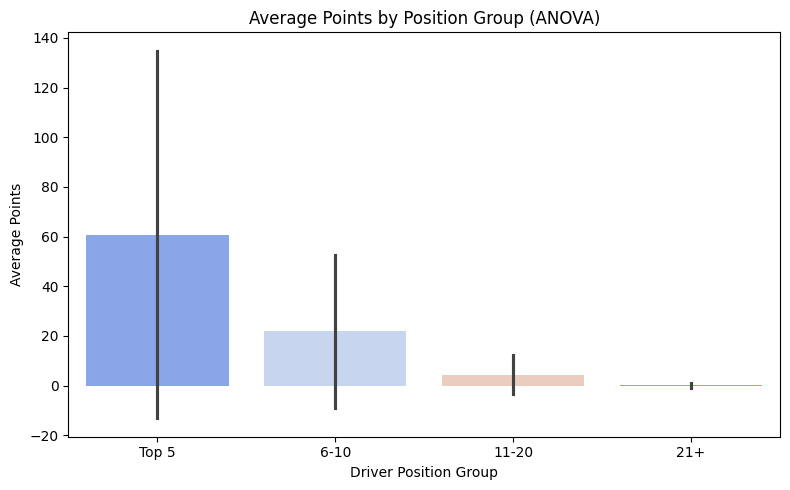

In [ ]:
# Drop missing values and categorize positions
df = df[['points', 'position']].dropna()
df['position_group'] = pd.cut(df['position'], bins=[0, 5, 10, 20, 40], labels=['Top 5', '6-10', '11-20', '21+'])

# Run ANOVA model
model = ols('points ~ position_group', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Plot the ANOVA bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='position_group', y='points', data=df, ci='sd', palette='coolwarm')
plt.title('Average Points by Position Group (ANOVA)')
plt.xlabel('Driver Position Group')
plt.ylabel('Average Points')
plt.tight_layout()



###  What the Chart Shows
This bar chart helps visually answer the question:
"Do drivers in better position ranges consistently earn more points?"

Tall bars for Top 5 = more points

Shorter bars for 21+ = fewer points

ANOVA test confirms if the group differences are statistically significant